In [1]:
# Importing the libraries
%matplotlib inline
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

# Importing the dataset
dataset = pd.read_csv('dataset1.csv')
print(dataset.shape)
dataset.head()
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, 2].values

(100, 3)


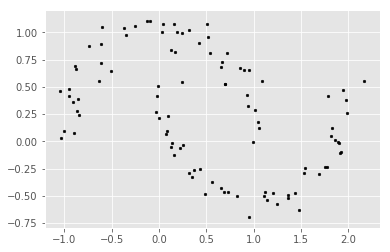

In [2]:
Z = np.array(list(zip(X, y)))
plt.scatter(X, y, c='black', s=7)
plt.show()

In [3]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [10]:
# Number of clusters
k = 2
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(Z), size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(Z), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[0. 1.]
 [1. 0.]]


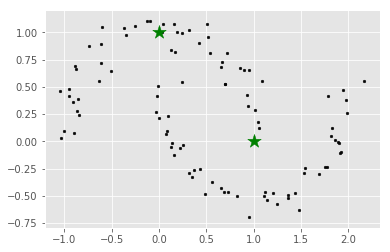

In [11]:
# Plotting along with the Centroids
plt.scatter(X, y, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')
plt.show()

In [12]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(Z))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(Z)):
        distances = dist(Z[i], C)
        #print(distances)
        cluster = np.argmin(distances)
        #print(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [Z[j] for j in range(len(Z)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

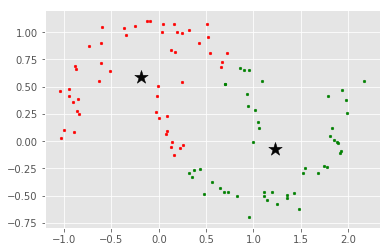

In [13]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([Z[j] for j in range(len(Z)) if clusters[j] == i])
        #print(clusters)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
plt.show()